In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gold_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(2290, 6)

In [10]:
print(df.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [11]:
df.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
1245,9/9/2013,1671.709961,133.910004,38.939999,22.840000,1.325803
572,8/19/2010,1075.630005,120.389999,33.250000,17.920000,1.280803
1137,3/4/2013,1525.199951,152.300003,32.400002,27.600000,1.301693
1579,2/27/2015,2104.500000,116.160004,18.100000,15.870000,1.120536
661,1/11/2011,1274.479980,134.910004,38.880001,28.889999,1.296496


# Split data feature and Target values

In [14]:
X = df.drop(columns=['Date','GLD'],axis=1)
Y = df['GLD']

In [15]:
print(X,Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor()

In [20]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
ypred = model.predict(X_test)
ypred2 = model.predict(X_train)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
print("Prediction on Test Data")
print("r2score: ",r2_score(ypred,Y_test))
print("MSE: ",mean_squared_error(ypred,Y_test))

Prediction on Test Data
r2score:  0.9889080079863277
MSE:  5.836936651457187


In [29]:
print("Prediction on Train Data")
print("r2score: ",r2_score(ypred2,Y_train))
print("MSE: ",mean_squared_error(ypred2,Y_train))

Prediction on Train Data
r2score:  0.9983904370138194
MSE:  0.8699597434610913


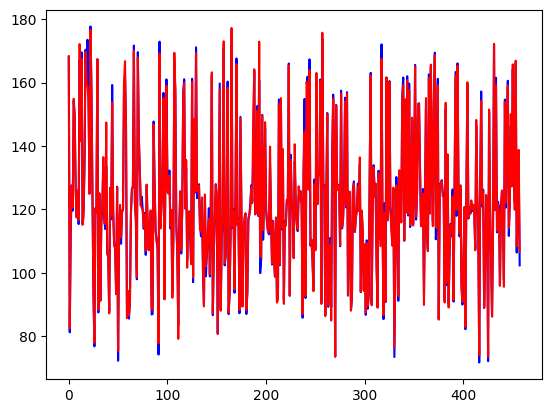

In [30]:
plt.plot(list(Y_test),color='blue')
plt.plot(list(ypred),color='red')